In [1]:
import numpy as np
import pandas as pd
import dask.dataframe as dd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

In [ ]:
df = pd.read_csv('interpolated_project_data.csv')
column_names = ['Global_active_power', 'Global_reactive_power', 'Voltage', 'Global_intensity',
                'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']

Standard (z-score) scaled dataframe:

In [2]:
# std_df = df.copy()
# scaler = StandardScaler()
std_df = pd.read_csv('interpolated_std_scaled_project_data.csv')
# columns_to_scale = std_df.columns[2:]
# std_df[columns_to_scale] = np.sqrt(std_df[columns_to_scale])
# std_df[columns_to_scale] = scaler.fit_transform(std_df[columns_to_scale])
# std_df.to_csv('interpolated_std_scaled_project_data.csv', index=False)

Scatterplots of Global Active Power and Global Intensity (Complete Dataset)

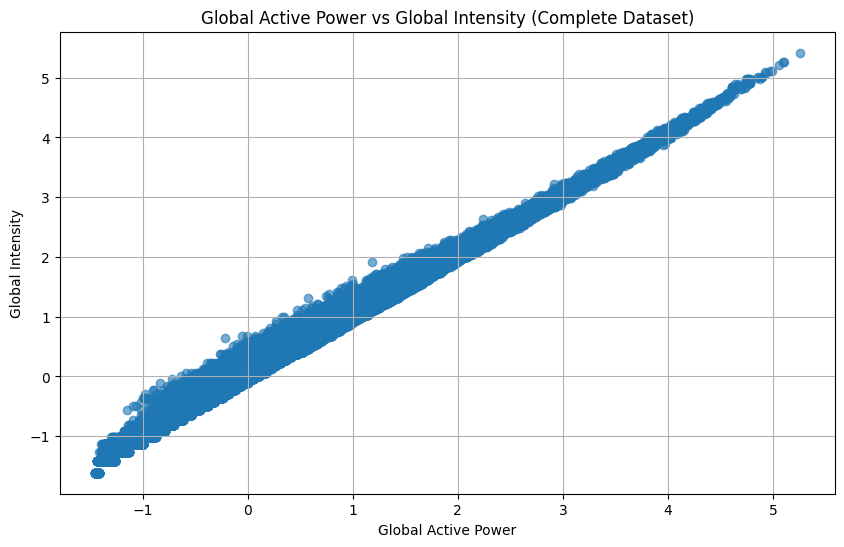

In [3]:
plt.figure(figsize=(10, 6))
plt.scatter(std_df['Global_active_power'], std_df['Global_intensity'], alpha=0.6)
plt.title('Global Active Power vs Global Intensity (Complete Dataset)')
plt.xlabel('Global Active Power')
plt.ylabel('Global Intensity')
plt.grid(True)
plt.show()

Min/max scaled dataframe (experimenting with different scaling methods)

In [5]:
# min_max_df = df.copy()
# scaler = MinMaxScaler()
# columns_to_scale = min_max_df.columns[2:]
# min_max_df[columns_to_scale] = np.sqrt(min_max_df[columns_to_scale])
# min_max_df[columns_to_scale] = scaler.fit_transform(min_max_df[columns_to_scale])
# min_max_df.to_csv('interpolated_scaled_project_data.csv', index=False)

Parsed out desired time window and day of week (Friday).
51 x 3 Fridays assigned to training dataset.
51 Fridays assigned to test dataset.
Exported CSV for use in R.

In [ ]:
# df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)
# time_as_timedelta = pd.to_timedelta(df['Time'].astype(str))
# df['datetime'] = df['Date'] + time_as_timedelta

# min_max_df['Date'] = pd.to_datetime(min_max_df['Date'], dayfirst=True)
# time_as_timedelta = pd.to_timedelta(min_max_df['Time'].astype(str))
# min_max_df['datetime'] = min_max_df['Date'] + time_as_timedelta

std_df['Date'] = pd.to_datetime(std_df['Date'], dayfirst=True)
time_as_timedelta = pd.to_timedelta(std_df['Time'].astype(str))
std_df['datetime'] = std_df['Date'] + time_as_timedelta

# friday_evenings = df[(df['datetime'].dt.time >= pd.to_datetime('18:00:00').time()) &
#                                   (df['datetime'].dt.time <= pd.to_datetime('23:59:00').time()) &
#                                   (df['datetime'].dt.dayofweek == 4)]

# friday_evenings_mm = min_max_df[(min_max_df['datetime'].dt.time >= pd.to_datetime('18:00:00').time()) &
#                                   (min_max_df['datetime'].dt.time <= pd.to_datetime('23:59:00').time()) &
#                                   (min_max_df['datetime'].dt.dayofweek == 4)]

friday_evenings_std = std_df[(std_df['datetime'].dt.time >= pd.to_datetime('18:00:00').time()) &
                                  (std_df['datetime'].dt.time <= pd.to_datetime('23:59:00').time()) &
                                  (std_df['datetime'].dt.dayofweek == 4)]


friday_evenings_std['Date'] = friday_evenings_std['datetime'].dt.date
all_fridays = friday_evenings_std['Date'].unique()
first_153 = all_fridays[:153]
next_51 = all_fridays[153:204]

friday_evenings_train = friday_evenings_std[friday_evenings_std['Date'].isin(first_153)]
friday_evenings_test = friday_evenings_std[friday_evenings_std['Date'].isin(next_51)]

# friday_evenings_train.drop('datetime', axis=1, inplace=True)
# friday_evenings_test.drop('datetime', axis=1, inplace=True)
# friday_evenings.drop('datetime', axis=1, inplace=True)
# friday_evenings_mm.drop('datetime', axis=1, inplace=True)
friday_evenings_std.drop('datetime', axis=1, inplace=True)
friday_evenings_train.drop('datetime', axis=1, inplace=True)
friday_evenings_test.drop('datetime', axis=1, inplace=True)

# friday_evenings_train.to_csv('scaled_training_data_friday.csv', index=False)
# friday_evenings_test.to_csv('scaled_testing_data_friday.csv', index=False)

Scatterplot of Global Active Power and Submetering 3 (Training Data)

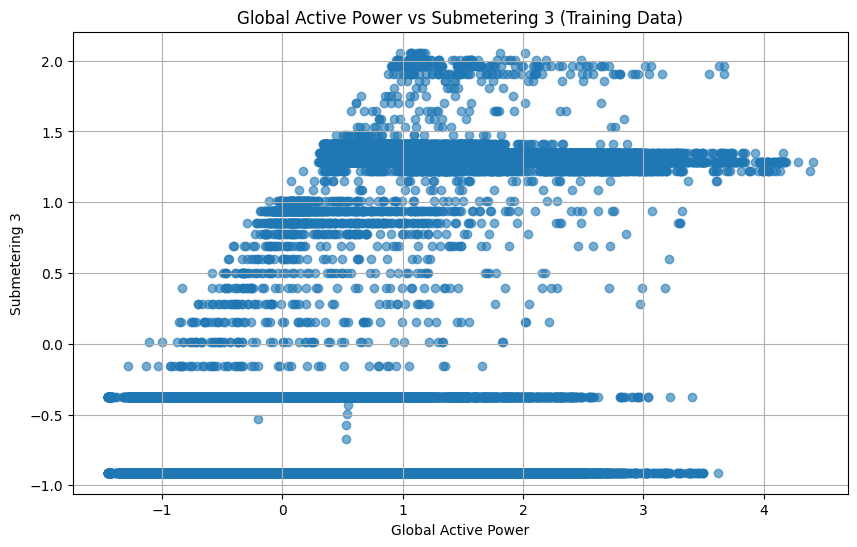

In [10]:
plt.figure(figsize=(10, 6))
plt.scatter(friday_evenings_train['Global_active_power'], friday_evenings_train['Sub_metering_3'], alpha=0.6)
plt.title('Global Active Power vs Submetering 3 (Training Data)')
plt.xlabel('Global Active Power')
plt.ylabel('Submetering 3')
plt.grid(True)
plt.show()

Scatterplot of Global Active Power and Submetering 3 (Test Data)

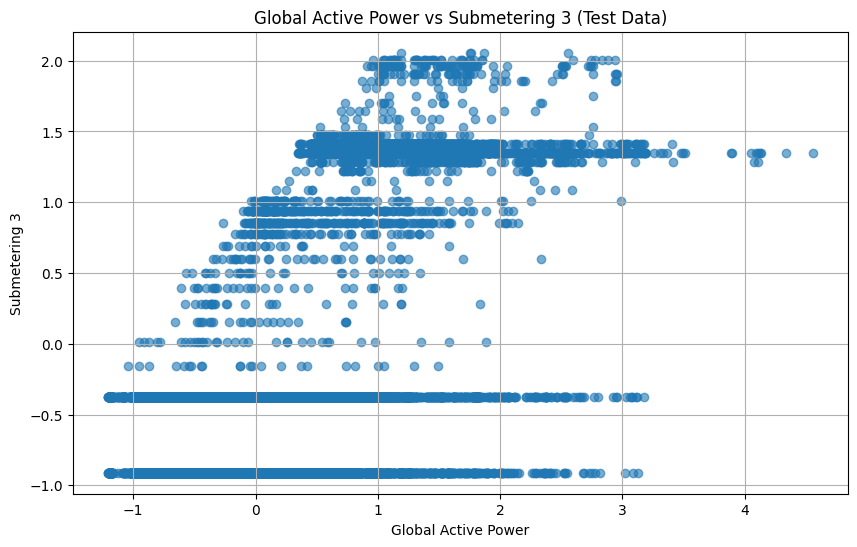

In [11]:
plt.figure(figsize=(10, 6))
plt.scatter(friday_evenings_test['Global_active_power'], friday_evenings_test['Sub_metering_3'], alpha=0.6)
plt.title('Global Active Power vs Submetering 3 (Test Data)')
plt.xlabel('Global Active Power')
plt.ylabel('Submetering 3')
plt.grid(True)
plt.show()

Overlayed histograms of Global Reactive Power complete dataset & training data.
Demonstrates reduced range of values in training data (fewer outliers).

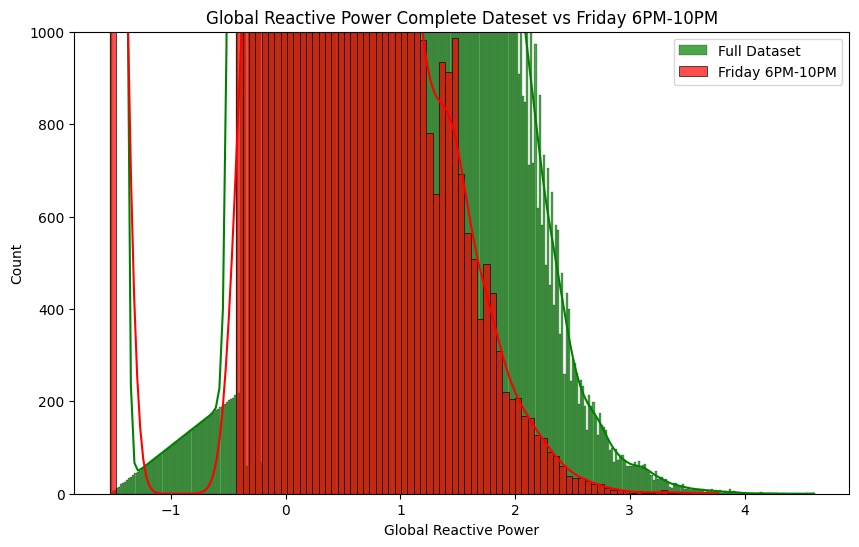

In [9]:
plt.figure(figsize=(10, 6))
sns.histplot(std_df['Global_reactive_power'], kde=True, color='green', alpha=0.7, label='Full Dataset')
sns.histplot(friday_evenings_std['Global_reactive_power'], kde=True, color='red', alpha=0.7, label='Friday 6PM-10PM')
plt.title('Global Reactive Power Complete Dateset vs Friday 6PM-10PM')
plt.xlabel('Global Reactive Power')
plt.legend()
plt.ylim([0, 1000])

plt.show()

Overlayed histograms of Global Active Power complete dataset & training data.
Demonstrates reduced range of values in training data (fewer outliers).

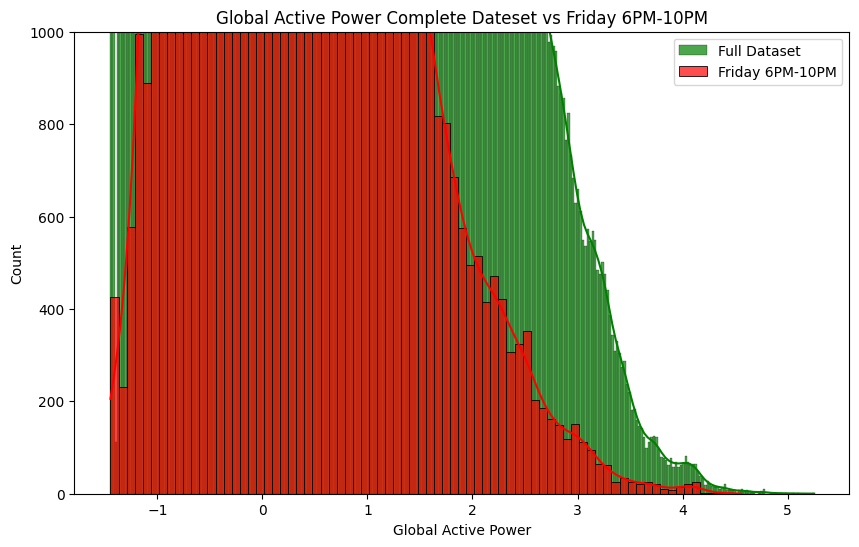

In [10]:
plt.figure(figsize=(10, 6))
sns.histplot(std_df['Global_active_power'], kde=True, color='green', alpha=0.7, label='Full Dataset')
sns.histplot(friday_evenings_std['Global_active_power'], kde=True, color='red', alpha=0.7, label='Friday 6PM-10PM')
plt.title('Global Active Power Complete Dateset vs Friday 6PM-10PM')
plt.xlabel('Global Active Power')
plt.legend()
plt.ylim([0, 1000])

plt.show()

Overlayed histograms of Submetering 3 complete dataset & training data.
Demonstrates absence of infrequent values in the training data (fewer outliers).

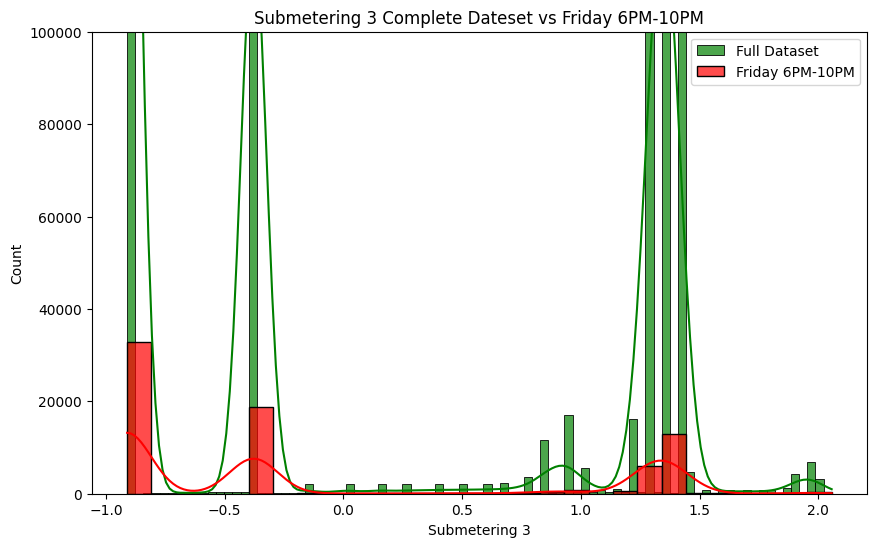

In [15]:
plt.figure(figsize=(10, 6))
sns.histplot(std_df['Sub_metering_3'], kde=True, color='green', alpha=0.7, label='Full Dataset')
sns.histplot(friday_evenings_std['Sub_metering_3'], kde=True, color='red', alpha=0.7, label='Friday 6PM-10PM')
plt.title('Submetering 3 Complete Dateset vs Friday 6PM-10PM')
plt.xlabel('Submetering 3')
plt.legend()
plt.ylim([0, 100000])

plt.show()

Custom rounding function to reduce the number of unique values in 'Global_reactive_power'

In [26]:
def round_to_half_2(x):
    x = x * 10
    remainder = abs(x - np.floor(x))
    if remainder < 0.50:
        return np.floor(x) / 10
    # elif remainder < 0.75:
    #     return (np.floor(x) + 0.5) / 10
    else:
        return np.ceil(x) / 10
    
def round_to_half_3(x):
    x = x * 10
    remainder = abs(x - np.floor(x))
    if remainder < 0.25:
        return np.floor(x) / 10
    elif remainder < 0.75:
        return (np.floor(x) + 0.5) / 10
    else:
        return np.ceil(x) / 10
    
friday_evenings_train = pd.read_csv('scaled_training_data_friday.csv')
friday_evenings_train['Global_reactive_power'] = friday_evenings_train['Global_reactive_power'].round(2)
friday_evenings_train['Global_reactive_power'] = friday_evenings_train['Global_reactive_power'].apply(round_to_half_2)

friday_evenings_train.nunique()

Date                      153
Time                      360
Global_active_power      2898
Global_reactive_power      43
Voltage                  1970
Global_intensity          183
Sub_metering_1             67
Sub_metering_2             79
Sub_metering_3             37
dtype: int64

Plot KDE (Density Estimation) histograms/curves on original training data & square root transformed min/max & standard scaled data.
Scaling and data distribution analysis.

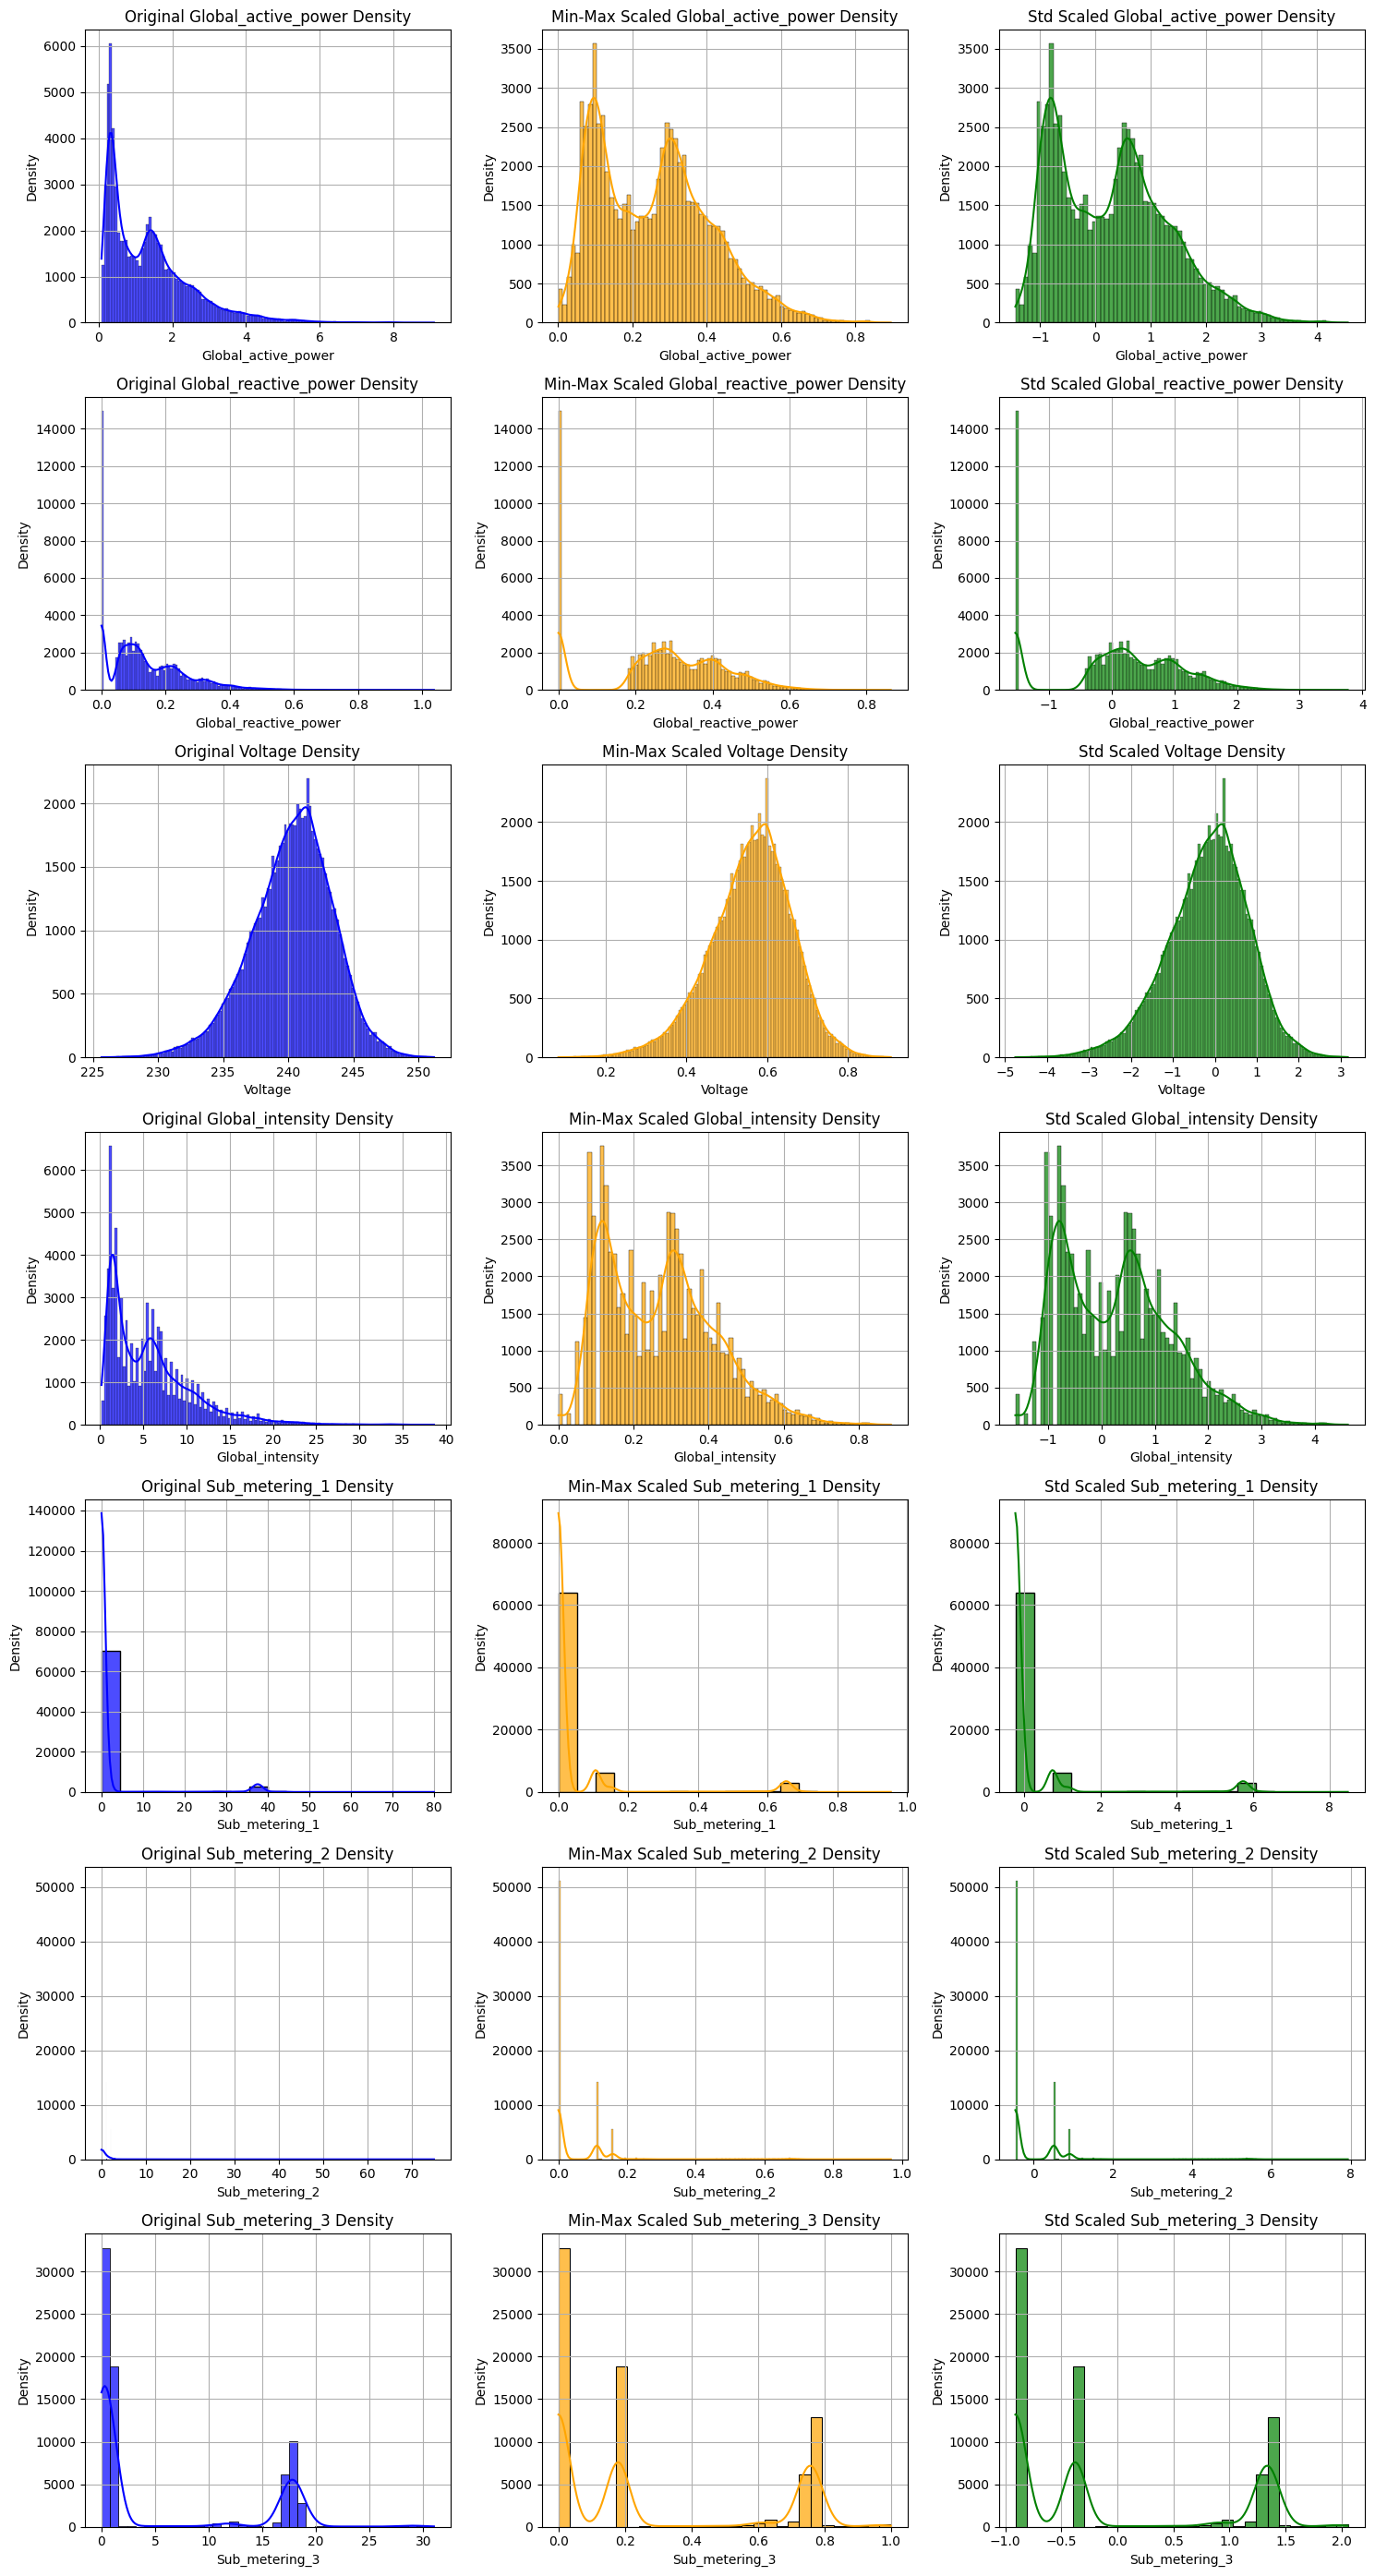

In [8]:
n_features = len(column_names)

# Create a subplot grid: one row for each feature, three columns for the three DataFrames
fig, axs = plt.subplots(nrows=n_features, ncols=3, figsize=(15, 4 * n_features))

for idx, col in enumerate(column_names):
    # Original df plot
    sns.histplot(friday_evenings[col], kde=True, color='blue', alpha=0.7, ax=axs[idx, 0])
    axs[idx, 0].set_title(f'Original {col} Density')
    axs[idx, 0].set_xlabel(col)
    axs[idx, 0].set_ylabel('Density')
    axs[idx, 0].grid(True)

    # Min-Max Scaled df plot
    sns.histplot(friday_evenings_mm[col], kde=True, color='orange', alpha=0.7, ax=axs[idx, 1])
    axs[idx, 1].set_title(f'Min-Max Scaled {col} Density')
    axs[idx, 1].set_xlabel(col)
    axs[idx, 1].set_ylabel('Density')
    axs[idx, 1].grid(True)

    # Std Scaled df plot
    sns.histplot(friday_evenings_std[col], kde=True, color='green', alpha=0.7, ax=axs[idx, 2])
    axs[idx, 2].set_title(f'Std Scaled {col} Density')
    axs[idx, 2].set_xlabel(col)
    axs[idx, 2].set_ylabel('Density')
    axs[idx, 2].grid(True)

plt.tight_layout()
plt.show()

Correlation Matrix for relationship between features, supporting evidence in addition to PC and loading score values explanation. 

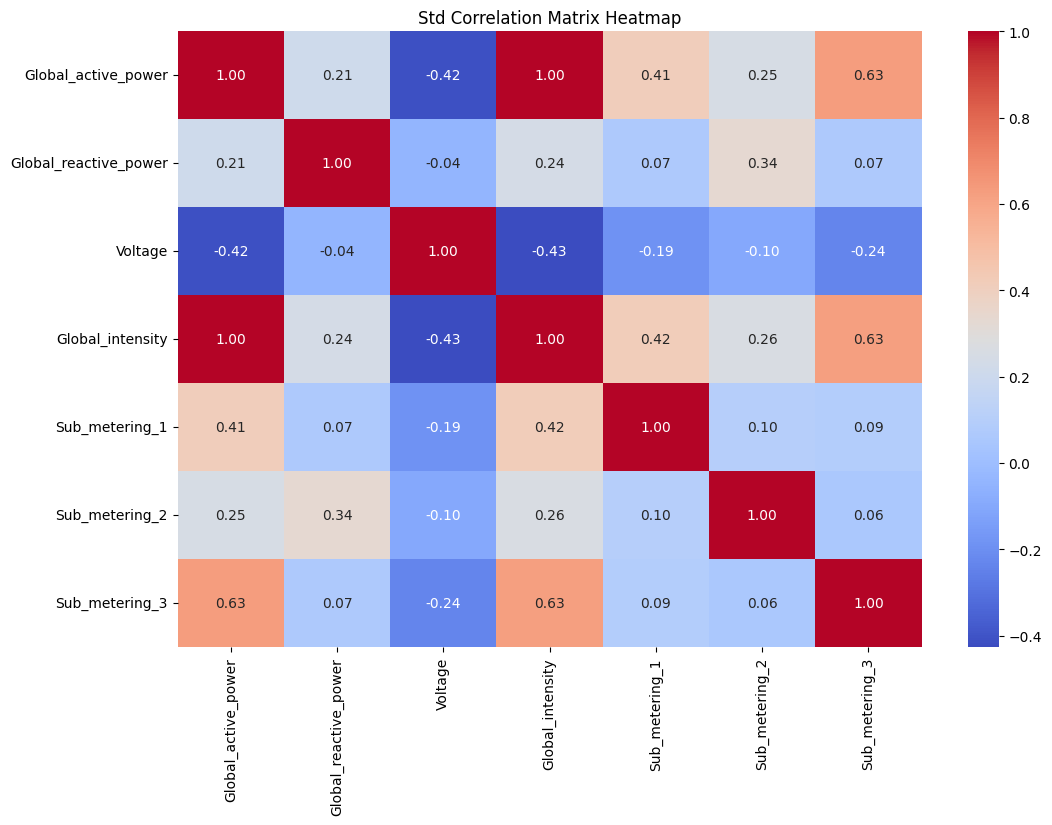

In [7]:
import seaborn as sns

# Since we do not have the actual dataset from the user, we will continue with the example data.
# The correlation matrix will be calculated on the DataFrame we've created.

# Calculate the correlation matrix
corr_matrix = friday_evenings_test.iloc[:, 2:].corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
heatmap = sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Std Correlation Matrix Heatmap')
plt.show()


Principal Component Analysis ratios indicating what % of the variance is captured in the component.
First 5 PCs capture ~ 95% of variance of whole dataset. 
Explained variance ratio:
PC1: 0.468229742
PC2: 0.143617237
PC3: 0.138084972
PC4: 0.124185774
PC5: 0.0906985870

PC1: 0.466754386
PC2: 0.145434724
PC3: 0.133319385
PC4: 0.118691458
PC5: 0.100424949

Plot of PC1 against PC2. Interpretation of which variables contribute to negative variance based on coefficients, voltage and sub metering 3.

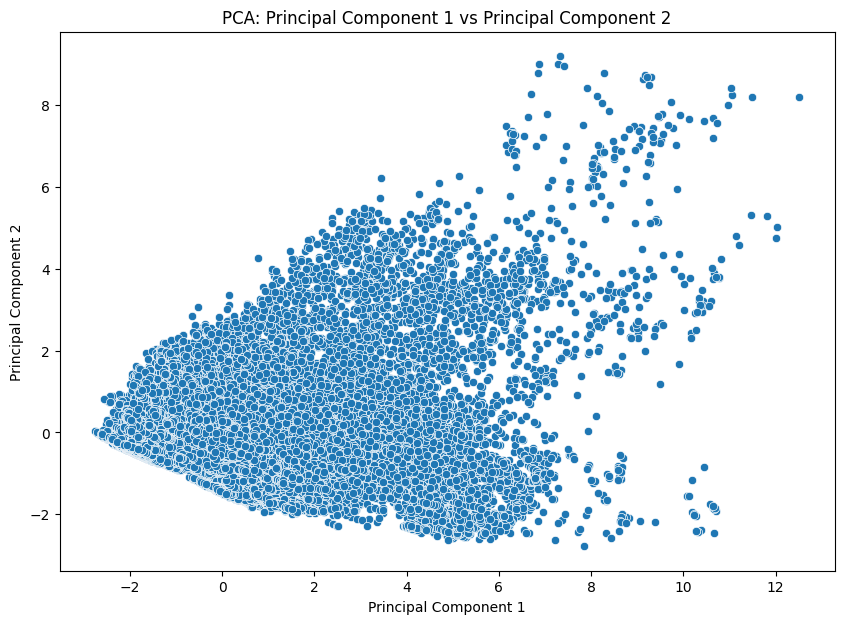

Explained variance ratio: [4.66754386e-01 1.45434724e-01 1.33319385e-01 1.18691458e-01
 1.00424949e-01 3.52853444e-02 8.97538413e-05]


In [10]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

X = friday_evenings.iloc[:, 2:].values

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Compute the Principal Components
pca = PCA()
principal_components = pca.fit_transform(X_scaled)

# Create a DataFrame with the principal components for plotting
principal_df = pd.DataFrame(data=principal_components,
                            columns=[f'Principal Component {i}' for i in range(1, pca.n_components_ + 1)])

# (II) Plot the first two principal components as an example
plt.figure(figsize=(10, 7))
sns.scatterplot(x='Principal Component 1', y='Principal Component 2', data=principal_df)
plt.title('PCA: Principal Component 1 vs Principal Component 2')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

# (III) Interpret the Results
# Print the explained variance ratio
print(f'Variance ratios: {pca.explained_variance_ratio_}')


Columns:
(1) Global_active_power
(2) Global_reactive_power
(7) Sub_metering_3

Loading Scores (coefficients for linear combination of original variables used to produce principal component values (dataset))

Min/Max Sqrt Scaled:
 [ 0.53299291  0.21197851 -0.3281336   0.53524434  0.34015667  0.2478694   0.31572092]
 [-0.08478281  0.69582667  0.05589329 -0.06423574  0.40856594 -0.02478749 -0.57779432]
 [-0.010125    0.03524195 -0.02567138 -0.00426035 -0.40060437  0.87166105 -0.27874983]
 [-0.04934396 -0.54364387 -0.60971711 -0.04500365  0.32984994  0.00503059 -0.46841215]
 [ 0.13203667 -0.40904336  0.7045648   0.11819442  0.48926424  0.22566765 -0.12067721]


Standard Sqrt Scaled: 
 [ 0.53354634  0.18478419 -0.33753168  0.53596985  0.32934805  0.23925902  0.33804848]
 [-0.04935188  0.66020625  0.16689529 -0.03391111 -0.11352198  0.61026051 -0.38390490]
 [ 0.037132   -0.30136501  0.0405177   0.02490068 -0.69365487  0.4724551   0.44851725]
 [ 0.02367117 -0.64326986 -0.16342678  0.02175298  0.27931598  0.48286161 -0.49728191]
 [-0.15720075  0.14753028 -0.90170685 -0.13945459 -0.29516032 -0.089541   -0.16081888]

In [ ]:
from sklearn.decomposition import PCA

# Assuming X_scaled is your standardized data with dimensions (n_samples, n_features)
pca = PCA(n_components=5)
pca.fit(X_scaled)

# The loading scores
loading_scores = pca.components_
print(loading_scores)

Correlation matrix of loading scores against first 5 PCA values for visualization of weight each column contributes to variances in PC1, 2, 3, 4, and 5. Use as supporting evidence to justify training variable choices. 

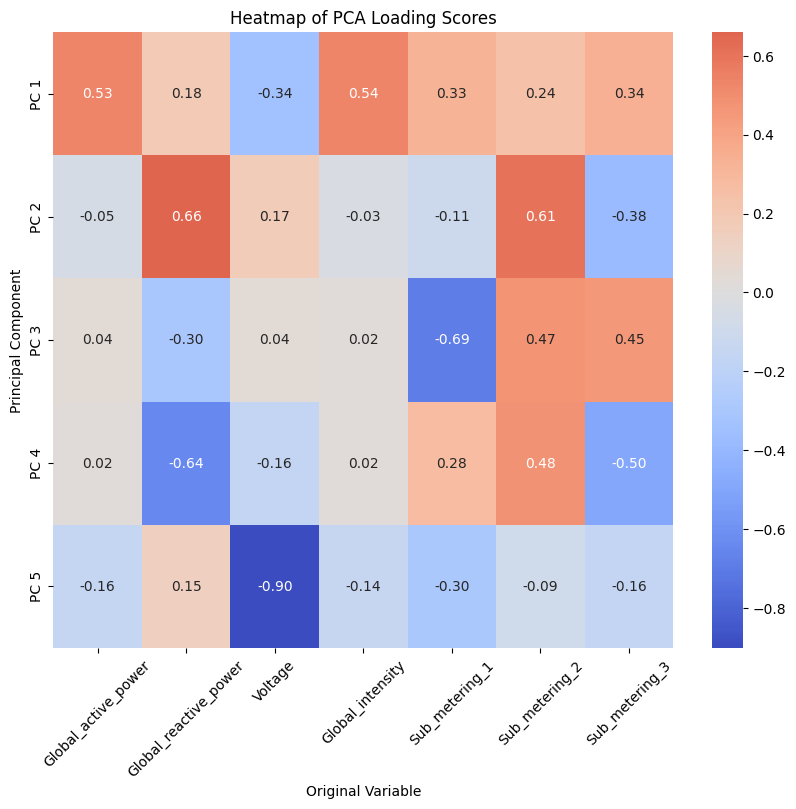

In [13]:
loading_scores_df = pd.DataFrame(data=loading_scores,
                                  index=[f'PC {i+1}' for i in range(5)],
                                  columns=column_names)

# Plot heatmap of loading scores
plt.figure(figsize=(10, 8))
sns.heatmap(loading_scores_df, annot=True, fmt=".2f", cmap='coolwarm', center=0)
plt.title('Heatmap of PCA Loading Scores')
plt.ylabel('Principal Component')
plt.xlabel('Original Variable')
plt.xticks(rotation=45)  # Rotate variable names for better readability
plt.show()